<a href="https://colab.research.google.com/github/Etsija/Stationeers-notes-and-calculations/blob/main/Mathematics_of_Combustion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fuel Combustion in Stationeers

## Credits

Credits of this work belong to Risu, a Stationeers Discord member and Community Developer, who made the original Excel sheet that described the combustion process for one atmospherics tick.

## Description of combustion

Fuel combustion needs volatiles and an oxidizer - in the game, either O2 or N2O/nitrous.  For volatiles and O2, the gas mix needs to be at 300 °C before combustion happens. For volatiles and N2O, the corresponding combustion temperature is 50 °C. There is no mol limit for the combustion to happen anymore.

Let's describe the combustion in an insulated pipe, where the combustion is governed by the amount of combustible gases, temperature and combustion rate (which is dependent of the temperature), and there is no heat loss due to convection or radiation.

Chemical/magical reactions for combustion are:

> $2H_2 + O_2 \rightarrow 6CO_2 + 3X$ + energy

> $H_2 + N_2O \rightarrow 2CO_2 + 2N_2$ + energy

Why "magical"? Because in an actual chemical process, elements cannot be created or destroyed. So this is more like game mechanics, rather than real life chemistry.

For each atmospheric tick, this happens:
1. Part of the volatiles and oxidizers combust, raising the temperature of the gas. This part is governed by the combustion rate, which decreases with increasing gas temperature. Note that there are devices like the Gas Fuel Generator, for which the combustion rate = 1 ie. they combust all of the input gas in one tick.
2. The combusted gases are removed from the gas composition.
3. Combustion resultant gases are added to the gas composition.

Using the combustion rate leads to an almost asymptotic process, where less and less combustible gases are left to raise the resultant gas temperature, so it eventually reaches an upper limit but in an asymptotic way.

## Mathematics of combustion

Initial condition:

> $T_{fuel} =$ gas temperature [K]

> $n_{H_2} =$ amount of volatiles [mol]

> $n_{O_2} =$ amount of oxygen [mol]

> $n_{N_2O} =$ amount of nitrous oxite [mol]

> $n_{X} =$ amount of X [mol]

> $n_{CO_2} =$ amount of carbon dioxide [mol]

> $n_{N_2} =$ amount of nitrogen [mol]

For each atmospheric tick, we calculate:

Total heat capacity of the gas:

> $C_{start} = \sum_{i}{n_i C_i} = n_{H_2}C_{H_2} + n_{O_2}C_{O_2} + n_{N_2O}C_{N_2O} + n_{X} C_{X} + n_{CO_2} C_{CO_2} + n_{N_2} C_{N_2},$

> $n_i$ = quantity of the gas in [mol]

> $C_i$ = heat capacity of the gas [J/mol K]

Total energy [J] of the gas in the start of the atmospheric tick:

> $E_{start} = T_{start} C_{start}$

Let's calculate the amount of volatiles and oxidizers taken in to combustion process.

> Volatiles needed for combustion of all gas left:

> $n_{H_2, needed} = 2n_{O_2} + n_{N_2O}$

> Ratio of different oxites in the gas:

> $r_{O_2} = \frac{2n_{O_2}}{n_{H_2,needed}}$

> $r_{N_2O} = \frac{n_{N_2O}}{n_{H_2,needed}}$

> Gases taken to combustion process:

> $n_{H_2, used} = \min(n_{H_2}, n_{H_2,needed})$

> $n_{O_2, used} = \frac{1}{2} r_{O_2} n_{H_2, used} = n_{O_2} \frac {n_{H_2, used}}{n_{H_2, needed}}$

> $n_{N_2O, used} = r_{N_2O} n_{H_2, used} = n_{N_2O} \frac{n_{H_2, used}}{n_{H_2, needed}}$

Let the combustion rate be $R_C = [0, 1]$. The amount of gases removed in the combustion can be calculated by calculating amount of volatiles removed in both combustion processes, and amount of oxidizers removed:

> $n_{H_2(O_2), rem} = R_C r_{O_2} n_{H_2, used} = 2R_C n_{O_2} \frac{n_{H_2, used}}{n_{H_2, needed}}$

> $n_{H_2(N_2O), rem} = R_C r_{N_2O} n_{H_2, used} = R_C n_{N_2O} \frac{n_{H_2, used}}{n_{H_2, needed}}$

> $n_{O_2, rem} = R_C n_{O_2, used} = R_C n_{O_2} \frac {n_{H_2, used}}{n_{H_2, needed}}$

> $n_{N_2O, rem} = R_C n_{N_2O, used} = R_C n_{N_2O} \frac {n_{H_2, used}}{n_{H_2, needed}}$

Composition of the combusted gas:

> $n_{H_2, output} = n_{H_2} - (n_{H_2(O_2), rem} + n_{N_2O, rem})$

> $n_{O_2, output} = n_{O_2} - n_{O_2, rem}$

> $n_{N_2O, output} = n_{N_2O} - n_{N_2O, rem}$

> $n_{X, output} = n_X + (n_{H_2(O_2), rem} + n_{O_2, rem})$

> $n_{CO_2, output} = n_{CO_2} + (3n_{H_2(O_2), rem} + 2n_{N_2O, rem})$

> $n_{N_2, output} = n_{N_2} + (n_{H_2(N_2O), rem} + n_{N_2O, rem})$

Let $E_{reaction}$ be the energy released in the combustion reaction.  Currently, in the game, this energy seems to be hardcoded as $E_{reaction} = 286000$ J. Properties of the combusted gas in the end of the atmospheric tick:

> $E_{end} = E_{start} + E_{reaction} (n_{H_2(O_2), rem} + 2n_{N_2O, rem})$

> $C_{end} = \sum_{i}{n_i C_i}, $ $n_i$ are taken from 5

> $T_{end} = \frac{E_{end}}{C_{end}}$

Finally, we set parameters for the start of next atmospheric tick and iterate again:

> $T_{fuel} \rightarrow T_{end}$

> $n_{H_2} \rightarrow n_{H_2, output}$

> $n_{O_2} \rightarrow n_{O_2, output}$

> $n_{N_2O} \rightarrow n_{N_2O, output}$

> $n_{X} \rightarrow n_{X, output}$

> $n_{CO_2} \rightarrow n_{CO_2, output}$

> $n_{N_2} \rightarrow n_{N_2, output}$

### Calculation of combustion rate $R_C$

If $r_{N_2O} \ge 0.1$

> $$R_C = 0.2 \min(1, \frac{1}{[0.0025(T_{fuel}+273.15)]^{1.01}} + 0.05)$$

Else

> $$R_C = 0.2 \min(1, \frac{1}{[0.002(T_{fuel}+273.15)]^{1.6}} + 0.05)$$

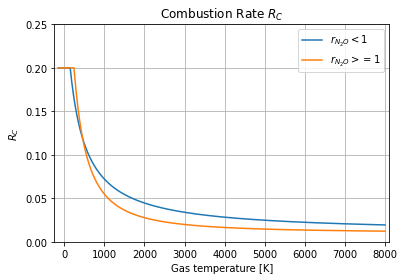

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

T_fuel = np.linspace(-150, 8000, 1000)
R_C1 = 1 / pow(0.0025 * (T_fuel + 273.15), 1.01) + 0.05
R_C1 = np.clip(R_C1, 0, 1)
R_C1 = 0.2*R_C1
R_C2 = 1 / pow(0.002 * (T_fuel + 273.15), 1.6) + 0.05
R_C2 = np.clip(R_C2, 0, 1)
R_C2 = 0.2*R_C2
fig, ax = plt.subplots()
ax.plot(T_fuel, R_C1)
ax.plot(T_fuel, R_C2)
ax.axis([min(T_fuel)-100, max(T_fuel)+100, 0, 0.25])
ax.grid(True)
ax.set_title('Combustion Rate $R_C$')
ax.set_xlabel('Gas temperature [K]')
ax.set_ylabel('$R_C$')
ax.legend(['$r_{N_2O} < 1$', '$r_{N_2O} >= 1$'])
fig.show()

## Implementation with Python

NOTE: Overriding the combustion rate hasn't been yet implemented.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
C_H2 = 20.4
C_O2 = 21.1
C_N2O = 23
C_X = 24.8
C_CO2 = 28.2
C_N2 = 20.6
E_reaction = 286000

# Combustion rate calculation
def CombustionRate(TfuelK, RatioN2O):
  if RatioN2O >= 0.1:
    tmpx = 0.0025
    tmpy = 1.01
  else:
    tmpx = 0.002
    tmpy = 1.6
  x = tmpx * (TfuelK + 273.15)
  y = 1 / pow(x, tmpy) + 0.05
  rate = min(1, y) / 5
  return rate

# Initial state
T_startC = -150
n_H2 = 1
n_O2 = 0
n_N2O = 1
n_X = 0
n_CO2 = 0
n_N2 = 0

T_startK = T_startC + 273.15
T_K = [T_startK]

while True:

  # 1. total heat capacity
  C_start = C_H2*n_H2 + C_O2*n_O2 + C_N2O*n_N2O + C_X*n_X + C_CO2*n_CO2 + C_N2*n_N2
  
  # 2. Total energy of the gas
  E_start = T_startK*C_start

  # 3. Volatiles needed
  n_H2needed = 2*n_O2 + n_N2O

  # 4. Ratio of oxites
  r_O2 = 2*n_O2 / n_H2needed
  r_N2O = n_N2O / n_H2needed

  # 5. Gases used
  n_H2used = min(n_H2, n_H2needed)
  n_O2used = 1/2*r_O2*n_H2used
  n_N2Oused = r_N2O*n_H2used

  # 6. Gases removed in combustion
  R_C = CombustionRate(T_startK, r_N2O)
  n_H2O2rem = R_C*n_H2used*r_O2
  n_H2N2Orem = R_C*n_H2used*r_N2O
  n_O2rem = R_C*n_O2used
  n_N2Orem = R_C*n_N2Oused

  # 7. Quantities left in the combusted gas
  n_H2out = n_H2 - (n_H2O2rem+n_H2N2Orem)
  n_O2out = n_O2 - n_O2rem
  n_N2Oout = n_N2O - n_N2Orem
  n_Xout = n_X + (n_H2O2rem+n_O2rem)
  n_CO2out = n_CO2 + (3*n_H2O2rem+2*n_N2Orem)
  n_N2out = n_N2 + (n_H2N2Orem+n_N2Orem)

  # 8. Properties of the gas in the end of tick
  E_end = E_start + E_reaction * (n_H2O2rem+2*n_N2Orem)
  C_end = C_H2*n_H2out + C_O2*n_O2out + C_N2O*n_N2Oout + C_X*n_Xout + C_CO2*n_CO2out + C_N2*n_N2out
  T_endK = E_end/C_end

  # 9. Break condition and set for the next tick
  if (T_endK-T_startK) < 0.001:
    break
  else:
    T_K.append(T_endK)
    T_startK = T_endK
    n_H2 = n_H2out
    n_O2 = n_O2out
    n_N2O = n_N2Oout
    n_X = n_Xout
    n_CO2 = n_CO2out
    n_N2 = n_N2out

T_C = T_K
T_C = [T_K-273.15 for T_K in T_C]

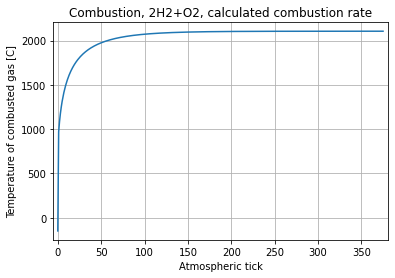

In [ ]:
fig, ax = plt.subplots()
ax.plot(T_C)
ax.axis([-5, len(T_C)+5, min(T_C)-100, max(T_C)+100])
ax.grid(True)
ax.set_title('Combustion, 2H2+O2, calculated combustion rate')
ax.set_xlabel('Atmospheric tick')
ax.set_ylabel('Temp of combusted gas [C]')
fig.show()

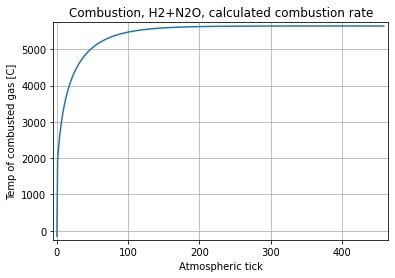

In [ ]:
fig, ax = plt.subplots()
ax.plot(T_C)
ax.axis([-5, len(T_C)+5, min(T_C)-100, max(T_C)+100])
ax.grid(True)
ax.set_title('Combustion, H2+N2O, calculated combustion rate')
ax.set_xlabel('Atmospheric tick')
ax.set_ylabel('Temp of combusted gas [C]')
fig.show()